# **Project-1**

In [1]:
!pip install transformers
!pip install matplotlib sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [3]:
text = "Artificial intelligence is transforming the world by automating tasks, improving efficiency, and enabling new forms of creativity. Large language models are at the forefront of this revolution, with capabilities in natural language understanding, generation, and more."


In [4]:
# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

# Token IDs
token_ids = tokenizer(text)["input_ids"]
print("\nToken IDs:", token_ids)

# Count tokens
print(f"\nTotal number of tokens: {len(tokens)}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Tokens: ['artificial', 'intelligence', 'is', 'transforming', 'the', 'world', 'by', 'auto', '##mat', '##ing', 'tasks', ',', 'improving', 'efficiency', ',', 'and', 'enabling', 'new', 'forms', 'of', 'creativity', '.', 'large', 'language', 'models', 'are', 'at', 'the', 'forefront', 'of', 'this', 'revolution', ',', 'with', 'capabilities', 'in', 'natural', 'language', 'understanding', ',', 'generation', ',', 'and', 'more', '.']

Token IDs: [101, 7976, 4454, 2003, 17903, 1996, 2088, 2011, 8285, 18900, 2075, 8518, 1010, 9229, 8122, 1010, 1998, 12067, 2047, 3596, 1997, 14842, 1012, 2312, 2653, 4275, 2024, 2012, 1996, 22870, 1997, 2023, 4329, 1010, 2007, 9859, 1999, 3019, 2653, 4824, 1010, 4245, 1010, 1998, 2062, 1012, 102]

Total number of tokens: 45


In [5]:
# Load the pre-trained BERT model
model = AutoModel.from_pretrained("bert-base-uncased")

# Get the embeddings
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# Extract token embeddings
embeddings = outputs.last_hidden_state[0].numpy()
print("\nShape of Embeddings:", embeddings.shape)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Shape of Embeddings: (47, 768)


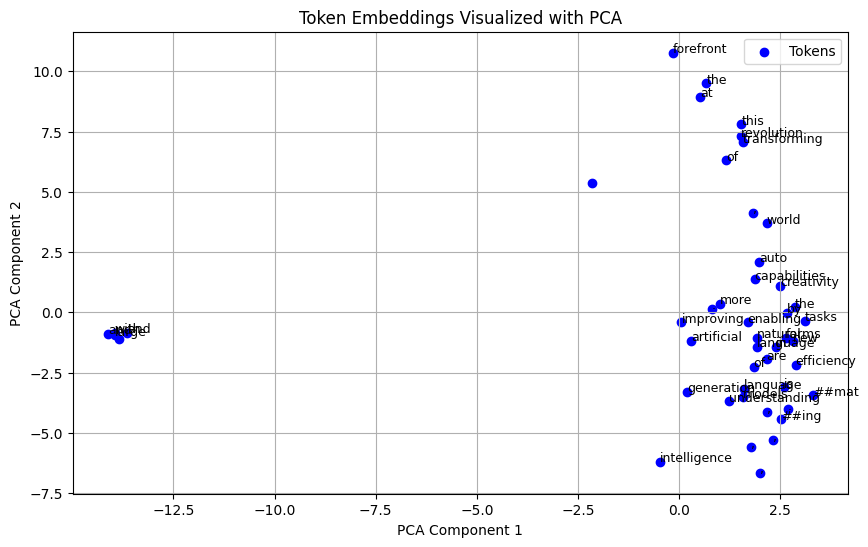

In [6]:
# Reduce dimensionality with PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot embeddings
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', label='Tokens')

# Label each point with the token
for i, token in enumerate(tokens):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], token, fontsize=9)

plt.title('Token Embeddings Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


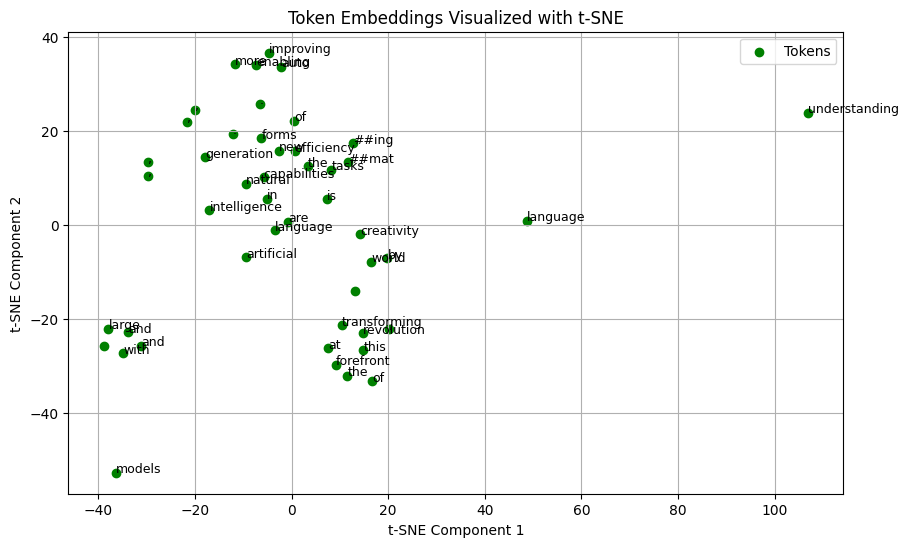

In [7]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=500)
embeddings_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c='green', label='Tokens')

# Label each point with the token
for i, token in enumerate(tokens):
    plt.text(embeddings_tsne[i, 0], embeddings_tsne[i, 1], token, fontsize=9)

plt.title('Token Embeddings Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


# **Project-2**

In [8]:
!pip install openai


In [9]:
!pip install transformers

In [10]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [11]:
text = """
Climate change is primarily caused by the increase in greenhouse gases like carbon dioxide and methane, largely due to human activities such as burning fossil fuels and deforestation. Its effects include rising global temperatures, melting ice caps, and more frequent extreme weather events. Solutions involve transitioning to renewable energy, reforestation, and adopting sustainable practices.
"""

In [12]:
# Generic Prompt
generic_prompt = "Summarize this text."
generic_output = summarizer(text, max_length=50, min_length=25, do_sample=False)
print("Generic Prompt Output:", generic_output[0]['summary_text'])

# Detailed Prompt
detailed_prompt = "Summarize this text, focusing on causes, effects, and solutions."
detailed_output = summarizer(text, max_length=50, min_length=25, do_sample=False)
print("Detailed Prompt Output:", detailed_output[0]['summary_text'])

# Highly Specific Prompt
specific_prompt = "Summarize this text in 3 bullet points: (1) cause, (2) effect, (3) solution."
specific_output = summarizer(text, max_length=75, min_length=50, do_sample=False)
print("Specific Prompt Output:", specific_output[0]['summary_text'])

Generic Prompt Output: Climate change is primarily caused by the increase in greenhouse gases like carbon dioxide and methane. Its effects include rising global temperatures, melting ice caps, and more frequent extreme weather events. Solutions involve transitioning to renewable energy, reforestation, and adopting


Your max_length is set to 75, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


Detailed Prompt Output: Climate change is primarily caused by the increase in greenhouse gases like carbon dioxide and methane. Its effects include rising global temperatures, melting ice caps, and more frequent extreme weather events. Solutions involve transitioning to renewable energy, reforestation, and adopting
Specific Prompt Output: Climate change is primarily caused by the increase in greenhouse gases like carbon dioxide and methane. Its effects include rising global temperatures, melting ice caps, and more frequent extreme weather events. Solutions involve transitioning to renewable energy, reforestation, and adopting sustainable practices.


# **Project-3**

In [13]:
!pip install transformers gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00


In [14]:
from transformers import pipeline

# Load the text-generation pipeline
generator = pipeline("text-generation", model="gpt2")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [15]:
def chatbot(input_text):
    response = generator(input_text, max_length=50, num_return_sequences=1)
    return response[0]['generated_text']

In [16]:
import gradio as gr

iface = gr.Interface(fn=chatbot, inputs="text", outputs="text", title="Mini Chatbot")
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a7fd45918cd33b1ed7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Project-4**

In [17]:
!pip install transformers

In [18]:
from transformers import pipeline

# Load the text-generation pipeline
generator = pipeline("text-generation", model="gpt2")

Device set to use cpu


In [19]:
# Chain of Thought Prompting
chain_of_thought_prompt = """
Write a short story about a robot learning to paint. Follow these steps:
1. Describe the robot's initial curiosity about art.
2. Show the robot's struggles and learning process.
3. End with the robot creating a masterpiece.
"""
chain_output = generator(chain_of_thought_prompt, max_length=150, num_return_sequences=1)
print("Chain of Thought Output:", chain_output[0]['generated_text'])

# Few-Shot Learning
few_shot_prompt = """
Example 1: A robot learned to cook and became a chef.
Example 2: A robot learned to dance and won a competition.
Now, write a story about a robot learning to paint.
"""
few_shot_output = generator(few_shot_prompt, max_length=150, num_return_sequences=1)
print("Few-Shot Output:", few_shot_output[0]['generated_text'])

# Role Play Prompting
role_play_prompt = """
Act as a famous artist and describe how you would teach a robot to paint.
"""
role_play_output = generator(role_play_prompt, max_length=150, num_return_sequences=1)
print("Role Play Output:", role_play_output[0]['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Chain of Thought Output: 
Write a short story about a robot learning to paint. Follow these steps:
1. Describe the robot's initial curiosity about art.
2. Show the robot's struggles and learning process.
3. End with the robot creating a masterpiece.
4. Review the robot's writing process.
5. Describe the robot's work and how it's performed.
6. Read about the robot's history.
7. Write off the robot's failure.
8. Write about potential customers and job opportunities.
9. Write about the robot's attitude and work ethic.
10. Write about the robot's history.
11. Describe the robot's overall work ethic.
12. Describe the robot


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Few-Shot Output: 
Example 1: A robot learned to cook and became a chef.
Example 2: A robot learned to dance and won a competition.
Now, write a story about a robot learning to paint.
Example 1: A robot named P.A.A. got bored and created P.A.A., which was a new company that built a kitchen robot, a house robot, and a robot based on it.
Here's how the robot looks through the time series:
A few shots show the difference.
An example-length story about a robot learning to sew is also shown in the beginning.
This is one of the coolest and most impressive robot stories ever created or created.
Just write it down and think about
Role Play Output: 
Act as a famous artist and describe how you would teach a robot to paint.

Do you have any specific ideas on what we can do to bring better results for your audience?

Trevor's Advice: For most clients, learning the right tools will be important in order to make things better for everyone.

When to Use Your Own Robot

The general rule of thumb is to 